# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

# Data

## A -  NCDC Website scrap

In [2]:
import requests
from bs4 import BeautifulSoup
url = "https://covid19.ncdc.gov.ng/"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
"""paragraphs = soup.find_all('p')"""
"""for p in paragraphs:
  print(p.text)"""
"""print(soup.prettify())"""

table = soup.find('table')
rows = table.find_all('tr')
ncdcdata = pd.DataFrame()
for row in rows:
    cells = row.find_all('td')
    data = [cell.text for cell in cells]
    if not data:
        continue
    ncdcdata = ncdcdata.append({'States Affected':data[0],'No. of Cases (Lab Confirmed)':data[1],'No. of Cases (on admission)':data[2],'No. Discharged':data[3],'No. of Deaths':data[4]}, ignore_index=True)

Removing newlines from data so its cleaner

In [3]:
NigCovid = ncdcdata.replace(r'\n',' ', regex=True)
print(NigCovid.head())

  States Affected No. of Cases (Lab Confirmed) No. of Cases (on admission)  \
0          Lagos                      104,204                       1,061    
1            FCT                       29,508                          19    
2         Rivers                       18,108                          -1    
3         Kaduna                       11,628                           3    
4            Oyo                       10,352                           0    

  No. Discharged No. of Deaths  
0       102,372           771   
1        29,240           249   
2        17,954           155   
3        11,536            89   
4        10,150           202   


## B - Cases from John Hopkins Data Repository

In [4]:
globalconfirmedurl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

globalconfirmed = pd.read_csv(globalconfirmedurl)

recoveredurl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

recovered = pd.read_csv(recoveredurl)

globaldeathurl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

globaldeath = pd.read_csv(globaldeathurl)

#### Restructure date columns in global confirmed cases

In [5]:
globalconfirmedheaders = np.array(globalconfirmed.columns)[4:]  # Select all date columns

globalconfirmedheadersMain = np.array(globalconfirmed.columns)[:4]  # Select all none date columns

globalconfirmed_new = pd.melt(globalconfirmed, id_vars=globalconfirmedheadersMain,
                              value_vars=globalconfirmedheaders, var_name='Date', value_name='cases').groupby(
    by=['Province/State', 'Country/Region', 'Lat', 'Long',
        'Date']).sum().reset_index()  # Arrange all date columns to one column, date.



#### Restructure date columns in global recovered cases

In [6]:
recoveredheaders = np.array(recovered.columns)[4:]  # Select all date columns

recoveredheadersheadersMain = np.array(recovered.columns)[:4]  # Select all none date columns

recovered_new = pd.melt(recovered, id_vars=recoveredheadersheadersMain,
                        value_vars=recoveredheaders, var_name='Date', value_name='cases').groupby(
    by=['Province/State', 'Country/Region', 'Lat', 'Long',
        'Date']).sum().reset_index()  # Arrange all date columns to one column, date.


#### Restructure date columns in global recovered cases

In [7]:
globaldeathheaders = np.array(globaldeath.columns)[4:]  # Select all date columns

globaldeathheadersMain = np.array(globaldeath.columns)[:4]  # Select all none date columns

globaldeath_new = pd.melt(globaldeath, id_vars=globaldeathheadersMain,
                          value_vars=globaldeathheaders, var_name='Date', value_name='cases').groupby(
    by=['Province/State', 'Country/Region', 'Lat', 'Long',
        'Date']).sum().reset_index()  # Arrange all date columns to one column, date.



## C - External Data

In [8]:
Budgetdataurl = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv'

RealGDPurl = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv'

externalFileurl = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv'

Budgetdata = pd.read_csv(Budgetdataurl)
RealGDP = pd.read_csv(RealGDPurl)
externalFile = pd.read_csv(externalFileurl)

## Task 2 -  View Data Properties

#### Reviewing First Five Data Points

#### Cases reported from NCDC

In [9]:
print(NigCovid.head())
print('*' * 50, '\n')

  States Affected No. of Cases (Lab Confirmed) No. of Cases (on admission)  \
0          Lagos                      104,204                       1,061    
1            FCT                       29,508                          19    
2         Rivers                       18,108                          -1    
3         Kaduna                       11,628                           3    
4            Oyo                       10,352                           0    

  No. Discharged No. of Deaths  
0       102,372           771   
1        29,240           249   
2        17,954           155   
3        11,536            89   
4        10,150           202   
************************************************** 



#### Cases from John Hopkins Data Repository


In [10]:
print(globalconfirmed_new.head())
print('*' * 50, '\n')
print(recovered_new.head())
print('*' * 50, '\n')
print(globaldeath_new.head())
print('*' * 50, '\n')

  Province/State Country/Region      Lat      Long     Date   cases
0        Alberta         Canada  53.9333 -116.5765   1/1/21  100428
1        Alberta         Canada  53.9333 -116.5765   1/1/22  361623
2        Alberta         Canada  53.9333 -116.5765  1/10/21  111452
3        Alberta         Canada  53.9333 -116.5765  1/10/22  412829
4        Alberta         Canada  53.9333 -116.5765  1/11/21  112091
************************************************** 

  Province/State  Country/Region      Lat     Long     Date  cases
0       Anguilla  United Kingdom  18.2206 -63.0686   1/1/21     12
1       Anguilla  United Kingdom  18.2206 -63.0686   1/1/22      0
2       Anguilla  United Kingdom  18.2206 -63.0686  1/10/21     13
3       Anguilla  United Kingdom  18.2206 -63.0686  1/10/22      0
4       Anguilla  United Kingdom  18.2206 -63.0686  1/11/21     13
************************************************** 

  Province/State Country/Region      Lat      Long     Date  cases
0        Alberta 

### External Data
#### Viewing data

In [11]:
print(Budgetdata.head())
print('*' * 50, '\n')
print(RealGDP.head())
print('*' * 50, '\n')
print(externalFile.head())
print('*' * 50, '\n')

      states  Initial_budget (Bn)  Revised_budget (Bn)
0       Abia               136.60               102.70
1    Adamawa               183.30               139.31
2  Akwa-Ibom               597.73               366.00
3    Anambra               137.10               112.80
4     Bauchi               167.20               128.00
************************************************** 

   Year           Q1           Q2           Q3           Q4
0  2014  15438679.50  16084622.31  17479127.58  18150356.45
1  2015  16050601.38  16463341.91  17976234.59  18533752.07
2  2016  15943714.54  16218542.41  17555441.69  18213537.29
3  2017  15797965.83  16334719.27  17760228.17  18598067.07
4  2018  16096654.19  16580508.07  18081342.10  19041437.59
************************************************** 

      states         region  Population  Overall CCVI Index  Age  \
0        FCT  North Central     4865000                 0.3  0.0   
1    Plateau  North Central     4766000                 0.4  0.5   


#### Reviewing Data info

Cases reported from NCDC

In [12]:
print(NigCovid.info())
print('*' * 50, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB
None
************************************************** 



Cases from John Hopkins Data Repository

In [13]:
print(globalconfirmed_new.info())
print('*' * 50, '\n')
print(recovered_new.info())
print('*' * 50, '\n')
print(globaldeath_new.info())
print('*' * 50, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95141 entries, 0 to 95140
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  95141 non-null  object 
 1   Country/Region  95141 non-null  object 
 2   Lat             95141 non-null  float64
 3   Long            95141 non-null  float64
 4   Date            95141 non-null  object 
 5   cases           95141 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 4.4+ MB
None
************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79106 entries, 0 to 79105
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  79106 non-null  object 
 1   Country/Region  79106 non-null  object 
 2   Lat             79106 non-null  float64
 3   Long            79106 non-null  float64
 4   Date            79106 non-nul

External Data


In [14]:
print(Budgetdata.info())
print('*' * 50, '\n')
print(RealGDP.info())
print('*' * 50, '\n')
print(externalFile.info())
print('*' * 50, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes
None
************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes
None
************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries

## Task 3 - Data Cleaning and Preparation

### Convert to appropriate data type

#### converter into date types

In [15]:
globalconfirmed_new['Date'] = pd.to_datetime(globalconfirmed_new.Date)

recovered_new['Date'] = pd.to_datetime(recovered_new.Date)

globaldeath_new['Date'] = pd.to_datetime(globaldeath_new.Date)

#### Remove commas and white spaces from scrapped data

Remove white spaces from data

In [16]:
NigCovid = NigCovid.applymap(lambda x: x.strip() if isinstance(x, str) else x)

Removing commas from data

In [17]:
NigCovid = NigCovid.replace(',','',regex = True)
print(NigCovid.head())

  States Affected No. of Cases (Lab Confirmed) No. of Cases (on admission)  \
0           Lagos                       104204                        1061   
1             FCT                        29508                          19   
2          Rivers                        18108                          -1   
3          Kaduna                        11628                           3   
4             Oyo                        10352                           0   

  No. Discharged No. of Deaths  
0         102372           771  
1          29240           249  
2          17954           155  
3          11536            89  
4          10150           202  


#### Rename columns in the Nigeria COVID-19 Data

In [18]:
Nigcovidheaders = np.array(NigCovid.columns)  #
NigCovid.rename(columns={Nigcovidheaders[0]: 'States',
                         Nigcovidheaders[1]: 'Confirmed',
                         Nigcovidheaders[2]: 'Admissions',
                         Nigcovidheaders[3]: 'Discharged',
                         Nigcovidheaders[4]: 'Deaths'}, inplace=True)

#### changing the data type

In [19]:
NigCovid=NigCovid.astype({'Confirmed':'int64','Admissions':'int64','Discharged':'int64','Deaths':'int64'})

#### Extract daily data for Nigeria from the Global daily cases data
#### look into countries present in the data set

In [20]:
print(globalconfirmed_new['Country/Region'].unique())

['Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia' 'New Zealand'
 'Denmark' 'France']


From the above it can be seen that no Nigeria present in the data

In [21]:
country = 'Nigeria'
Nigeria = globalconfirmed_new[globalconfirmed_new['Country/Region'] == country]
print(Nigeria)
print('No Nigeria present in the data')

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, Date, cases]
Index: []
No Nigeria present in the data


# Task 4 - Analysis
### Confirmed Covid cases by Laboratory test

#### TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

    States  Confirmed
0    Lagos     104204
1      FCT      29508
2   Rivers      18108
3   Kaduna      11628
4      Oyo      10352
5  Plateau      10341
6      Edo       7927
7    Delta       5834
8     Ogun       5810
9     Kano       5384
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   States     10 non-null     object
 1   Confirmed  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None


<Figure size 4000x3000 with 0 Axes>

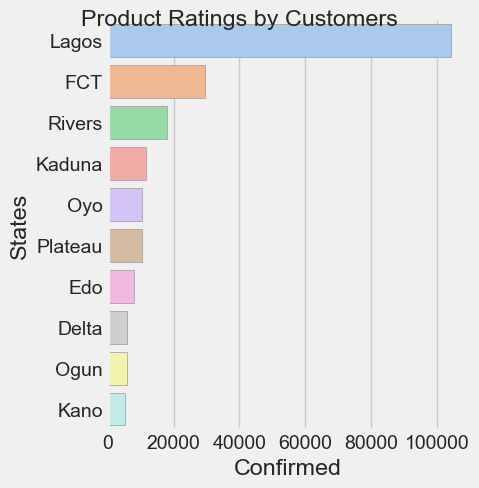

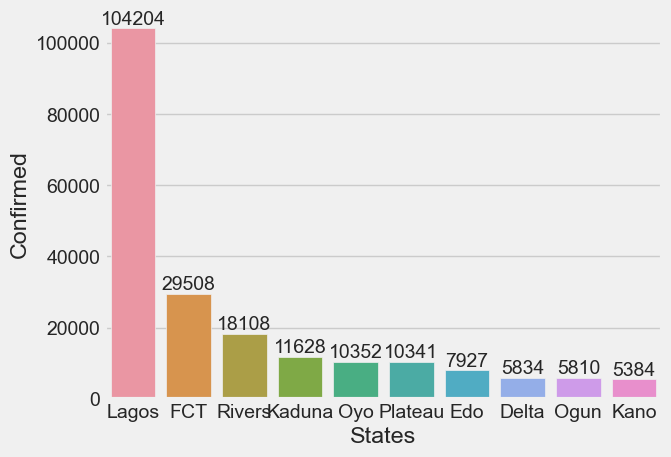

In [22]:
Top_10_Confirmed = NigCovid.nlargest(10, columns=['Confirmed'])[['States', 'Confirmed']]
print(Top_10_Confirmed)
print(Top_10_Confirmed.info())
plt.figure(figsize=(40, 30))
g = sns.catplot(x='Confirmed', y="States", kind="bar",
                palette="pastel", edgecolor=".6", errwidth=0,
                data=Top_10_Confirmed).fig.suptitle('Product Ratings by Customers')
plt.show()

b = sns.barplot(x="States", y='Confirmed', data=Top_10_Confirmed)
plt.bar_label(b.containers[0])
plt.show()

### TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases

    States  Discharged
0    Lagos      102372
1      FCT       29240
2   Rivers       17954
3   Kaduna       11536
5  Plateau       10260
4      Oyo       10150
6      Edo        7601
8     Ogun        5717
9     Kano        5219
7    Delta        5170
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   States      10 non-null     object
 1   Discharged  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None


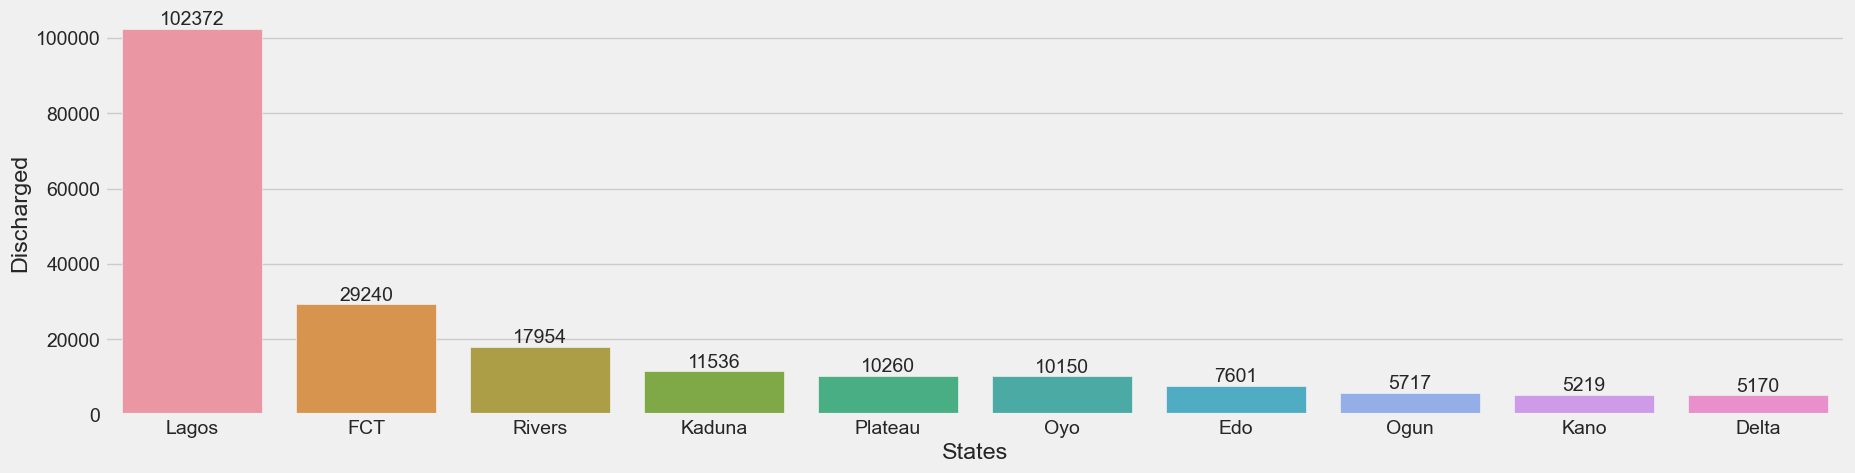

In [23]:
Top_10_Discharged = NigCovid.nlargest(10, columns=['Discharged'])[['States', 'Discharged']]
print(Top_10_Discharged)
print(Top_10_Discharged.info())
plt.figure(figsize=(20, 5))

b = sns.barplot(x="States", y='Discharged', data=Top_10_Discharged)
plt.bar_label(b.containers[0])
plt.show()

### TODO D - Plot the top 10 Death cases

    States  Deaths
0    Lagos     771
6      Edo     322
1      FCT     249
4      Oyo     202
2   Rivers     155
9     Kano     127
7    Delta     112
10    Ondo     109
14    Osun      92
3   Kaduna      89
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   States  10 non-null     object
 1   Deaths  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None


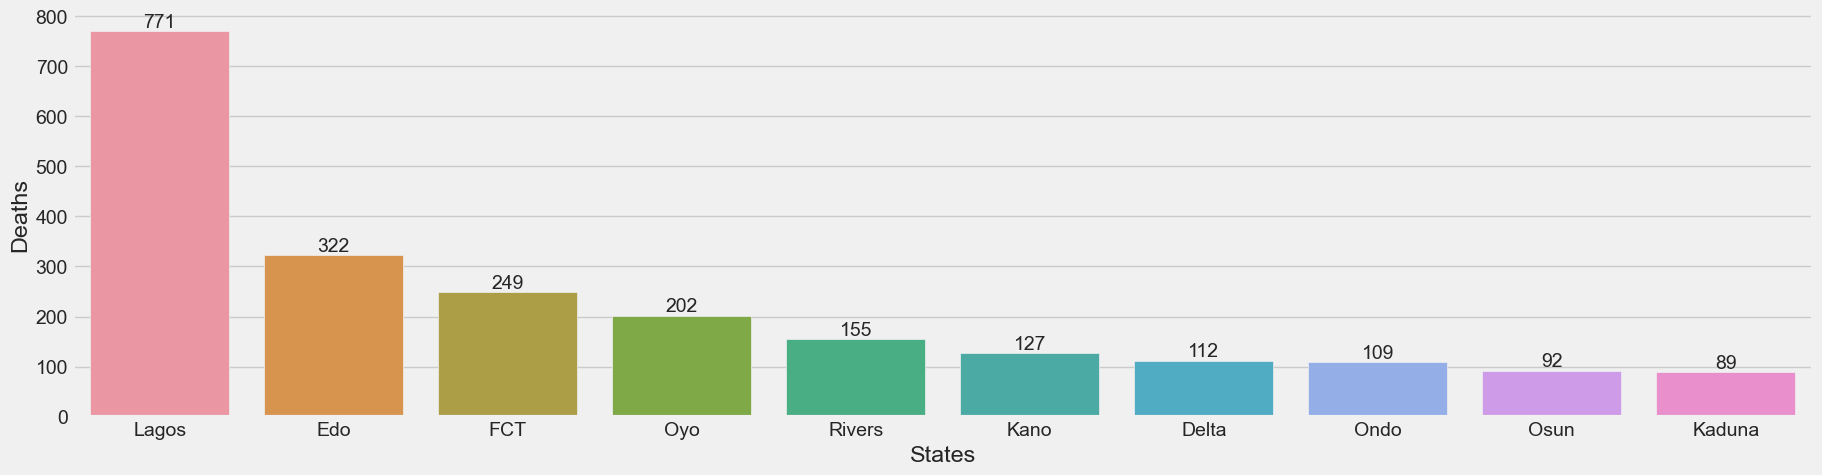

In [24]:
Top_10_Deaths = NigCovid.nlargest(10, columns=['Deaths'])[['States', 'Deaths']]
print(Top_10_Deaths)
print(Top_10_Deaths.info())
plt.figure(figsize=(20, 5))

b = sns.barplot(x="States", y='Deaths', data=Top_10_Deaths)
plt.bar_label(b.containers[0])
plt.show()

### TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

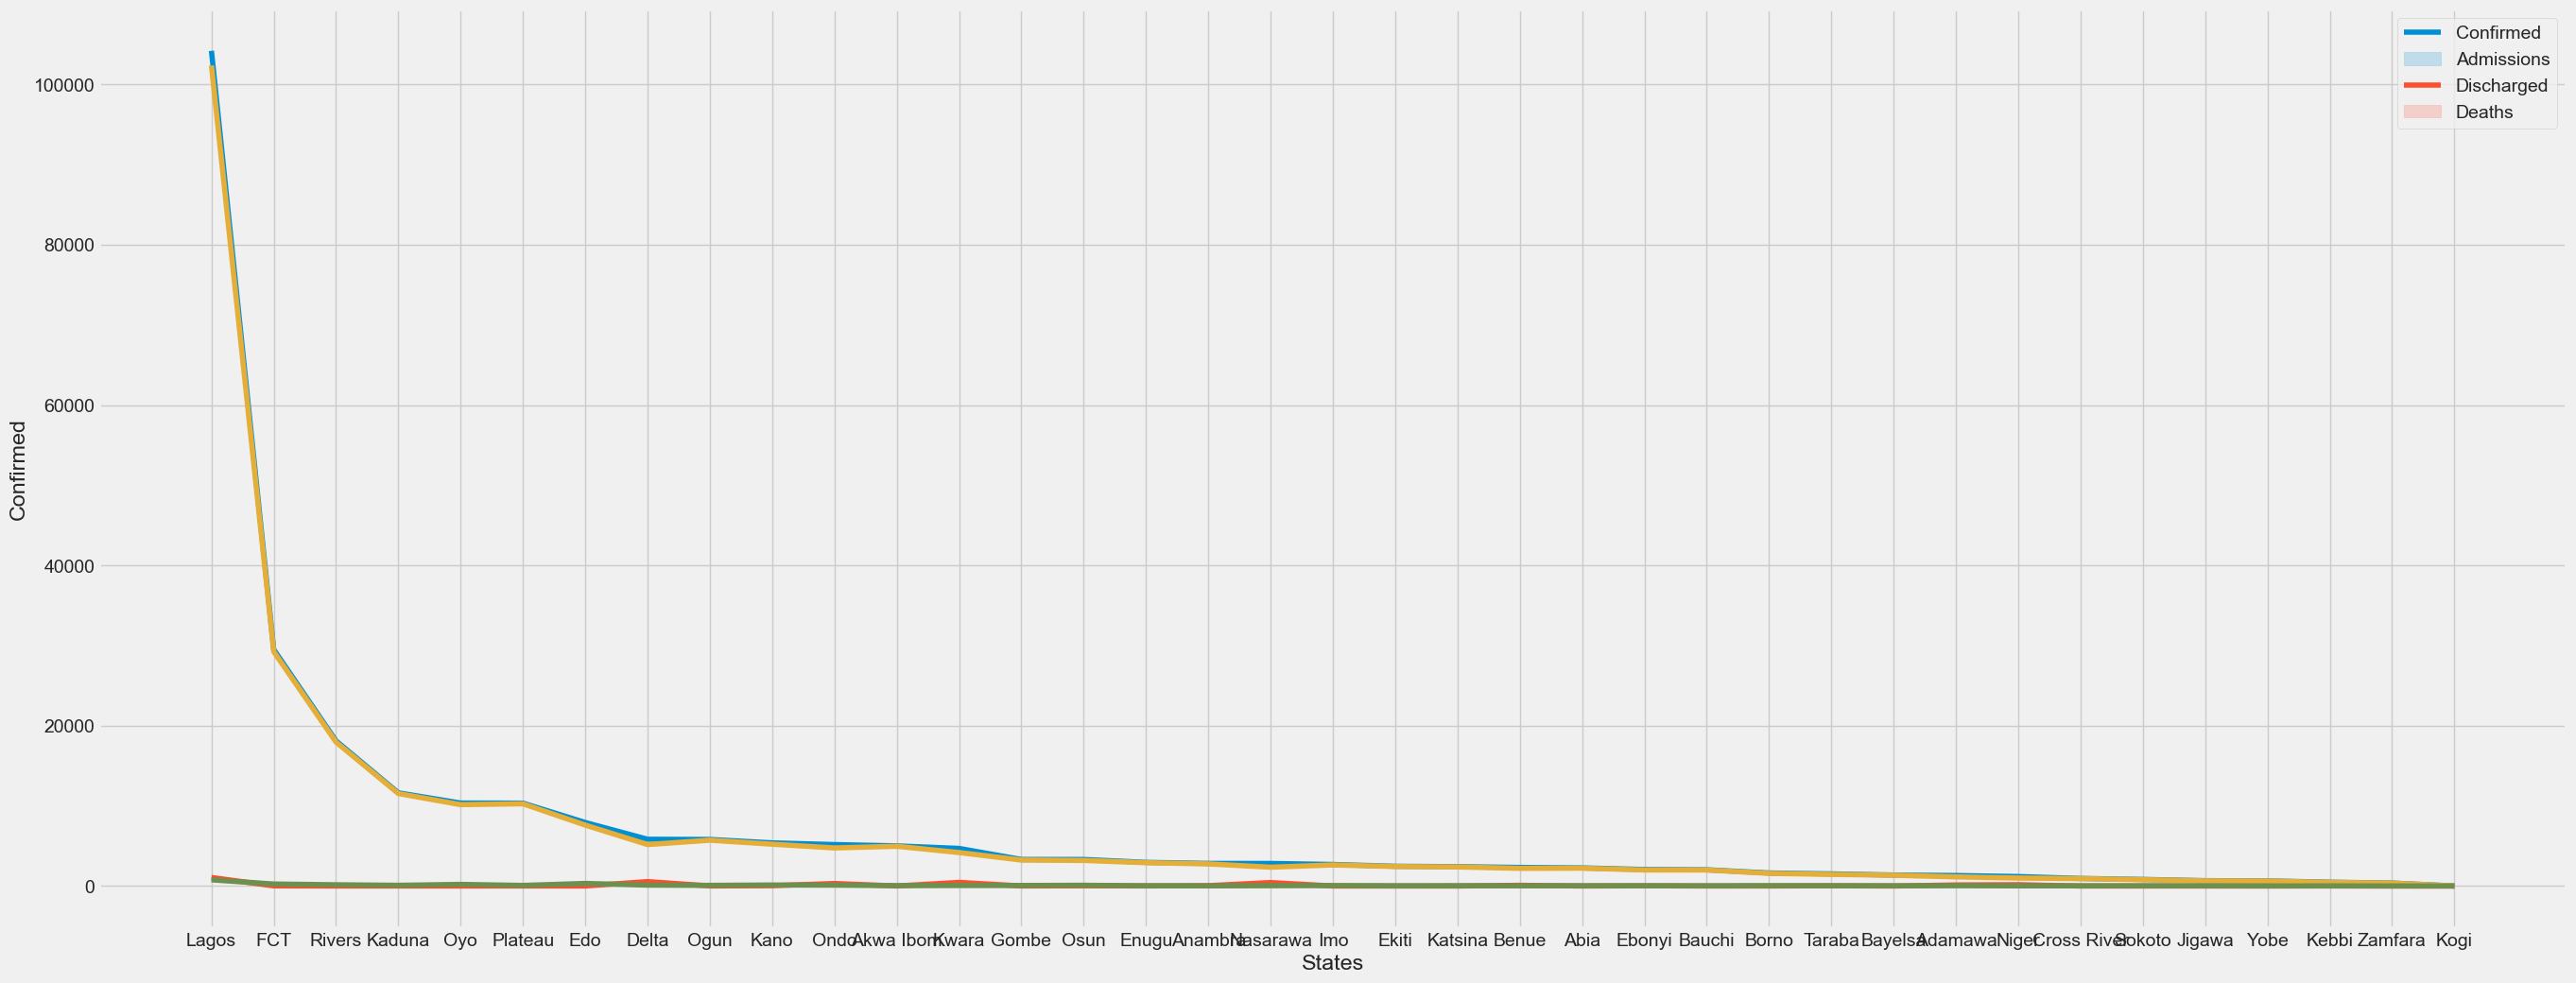

In [25]:
plt.figure(figsize=(30, 12))
sns.lineplot(x='States', y='Confirmed', data=NigCovid)
sns.lineplot(x='States', y='Admissions', data=NigCovid)
sns.lineplot(x='States', y='Discharged', data=NigCovid)
sns.lineplot(x='States', y='Deaths', data=NigCovid)
plt.legend(['Confirmed', 'Admissions', 'Discharged', 'Deaths'])
plt.show()

### TODO F - Infection Rate

               cases
Date                
2020-01-22       548
2020-01-23       645
2020-01-24       923
2020-01-25      1409
2020-01-26      2082
...              ...
2022-12-21  19887793
2022-12-22  19997593
2022-12-23  20031877
2022-12-24  20055494
2022-12-25  20078370

[1069 rows x 1 columns]
                cases
Date                 
2020-01-23  15.038760
2020-01-24  30.119177
2020-01-25  34.492548
2020-01-26  32.324688
2020-01-27  27.833622
...               ...
2022-12-21   0.149861
2022-12-22   0.549066
2022-12-23   0.171147
2022-12-24   0.117758
2022-12-25   0.113934

[1068 rows x 1 columns]


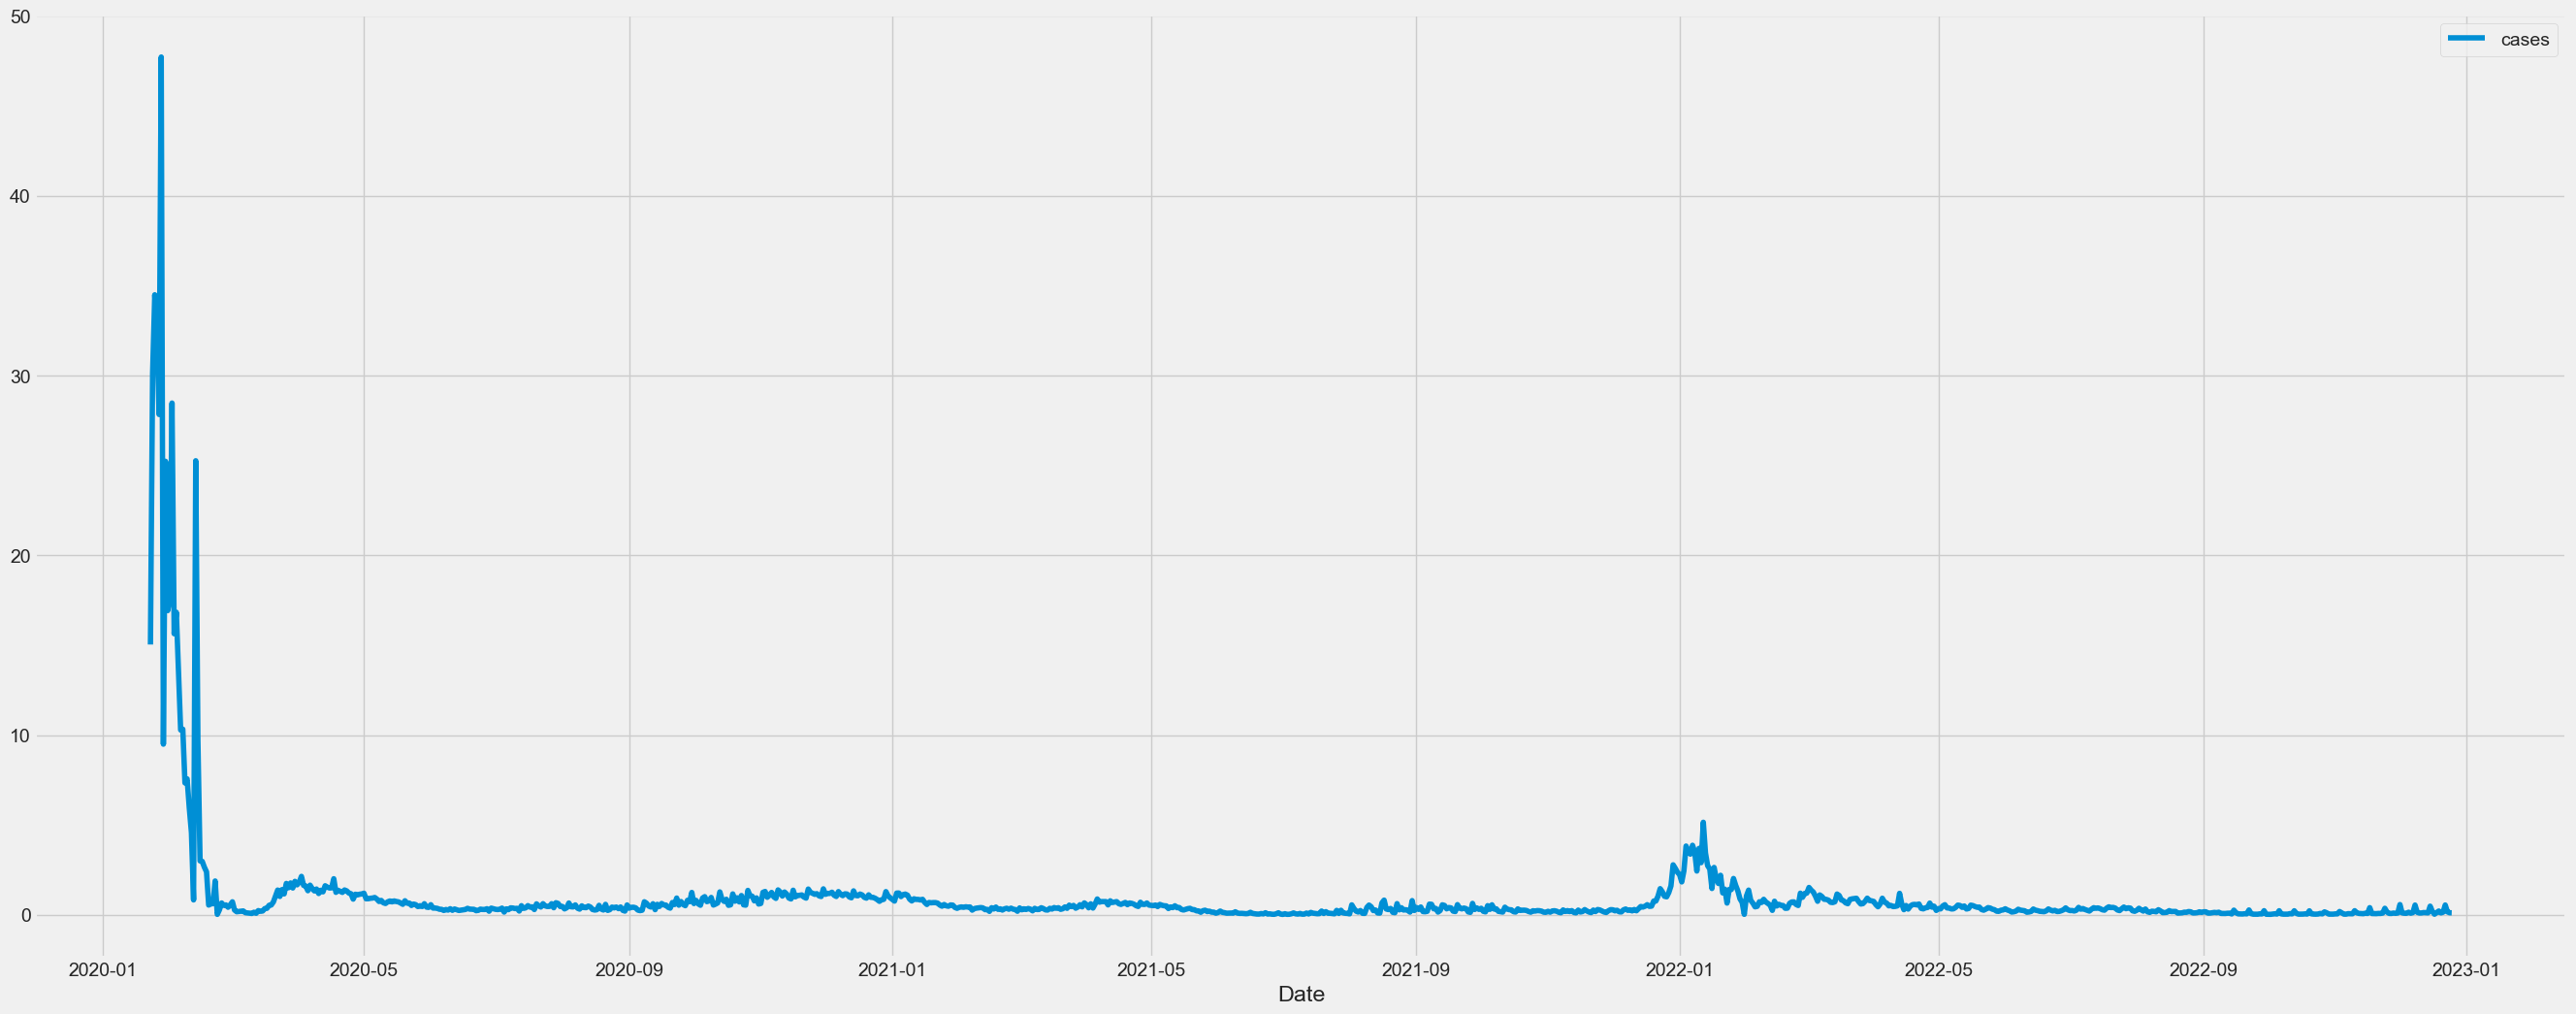

In [26]:
data_rate = globalconfirmed_new[['Date', 'cases']].groupby(by='Date').sum('cases')
print(data_rate)
data_rate_diff = (data_rate.diff() / data_rate) * 100
data_rate_diff = data_rate_diff.dropna()
print(data_rate_diff)

plt.figure(figsize=(30, 12))
sns.lineplot(data=data_rate_diff)
plt.show()

TODO G - Maximum infection rate for a day

In [50]:
max_infection_rate = data_rate_diff.cases.max()
print(f'The highest rate of infection is: {max_infection_rate}% or {round(max_infection_rate)}%')

max_infection_date = data_rate_diff.cases == max_infection_rate
max_infection_date = data_rate_diff[max_infection_date].index.item()
print(f'Date with the highest infection rate: {max_infection_date}')

The highest rate of infection is: 47.716563972453784% or 48%
Date with the highest infection rate: 2020-01-28 00:00:00


### TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset

#### Combining datasets

In [52]:
Nigcovidheaders = np.array(NigCovid.columns)  #
NigCovid.rename(columns={Nigcovidheaders[0]: 'states'},
                inplace=True)  #Rename the States title to all small caps for the analysis

NigCovid.head()

,states,Confirmed,Admissions,Discharged,Deaths
0,Lagos,104204,1061,102372,771
1,FCT,29508,19,29240,249
2,Rivers,18108,-1,17954,155
3,Kaduna,11628,3,11536,89
4,Oyo,10352,0,10150,202


In [53]:
externalFile.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


#### Merged NCDC data with the external dataset

##### Merging external data with NCDC

In [54]:
NCDCextdata = pd.merge(NigCovid, externalFile, how='left', on='states')

##### Getting top 10 confrimed cases

In [55]:
Top_10_NCDCextdata = NCDCextdata.nlargest(10, columns='Confirmed')
Top_10_NCDCextdata

,states,Confirmed,Admissions,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104204,1061,102372,771,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29508,19,29240,249,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,18108,-1,17954,155,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11628,3,11536,89,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10352,0,10150,202,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10341,6,10260,75,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
6,Edo,7927,4,7601,322,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Delta,5834,552,5170,112,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
8,Ogun,5810,11,5717,82,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
9,Kano,5384,38,5219,127,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


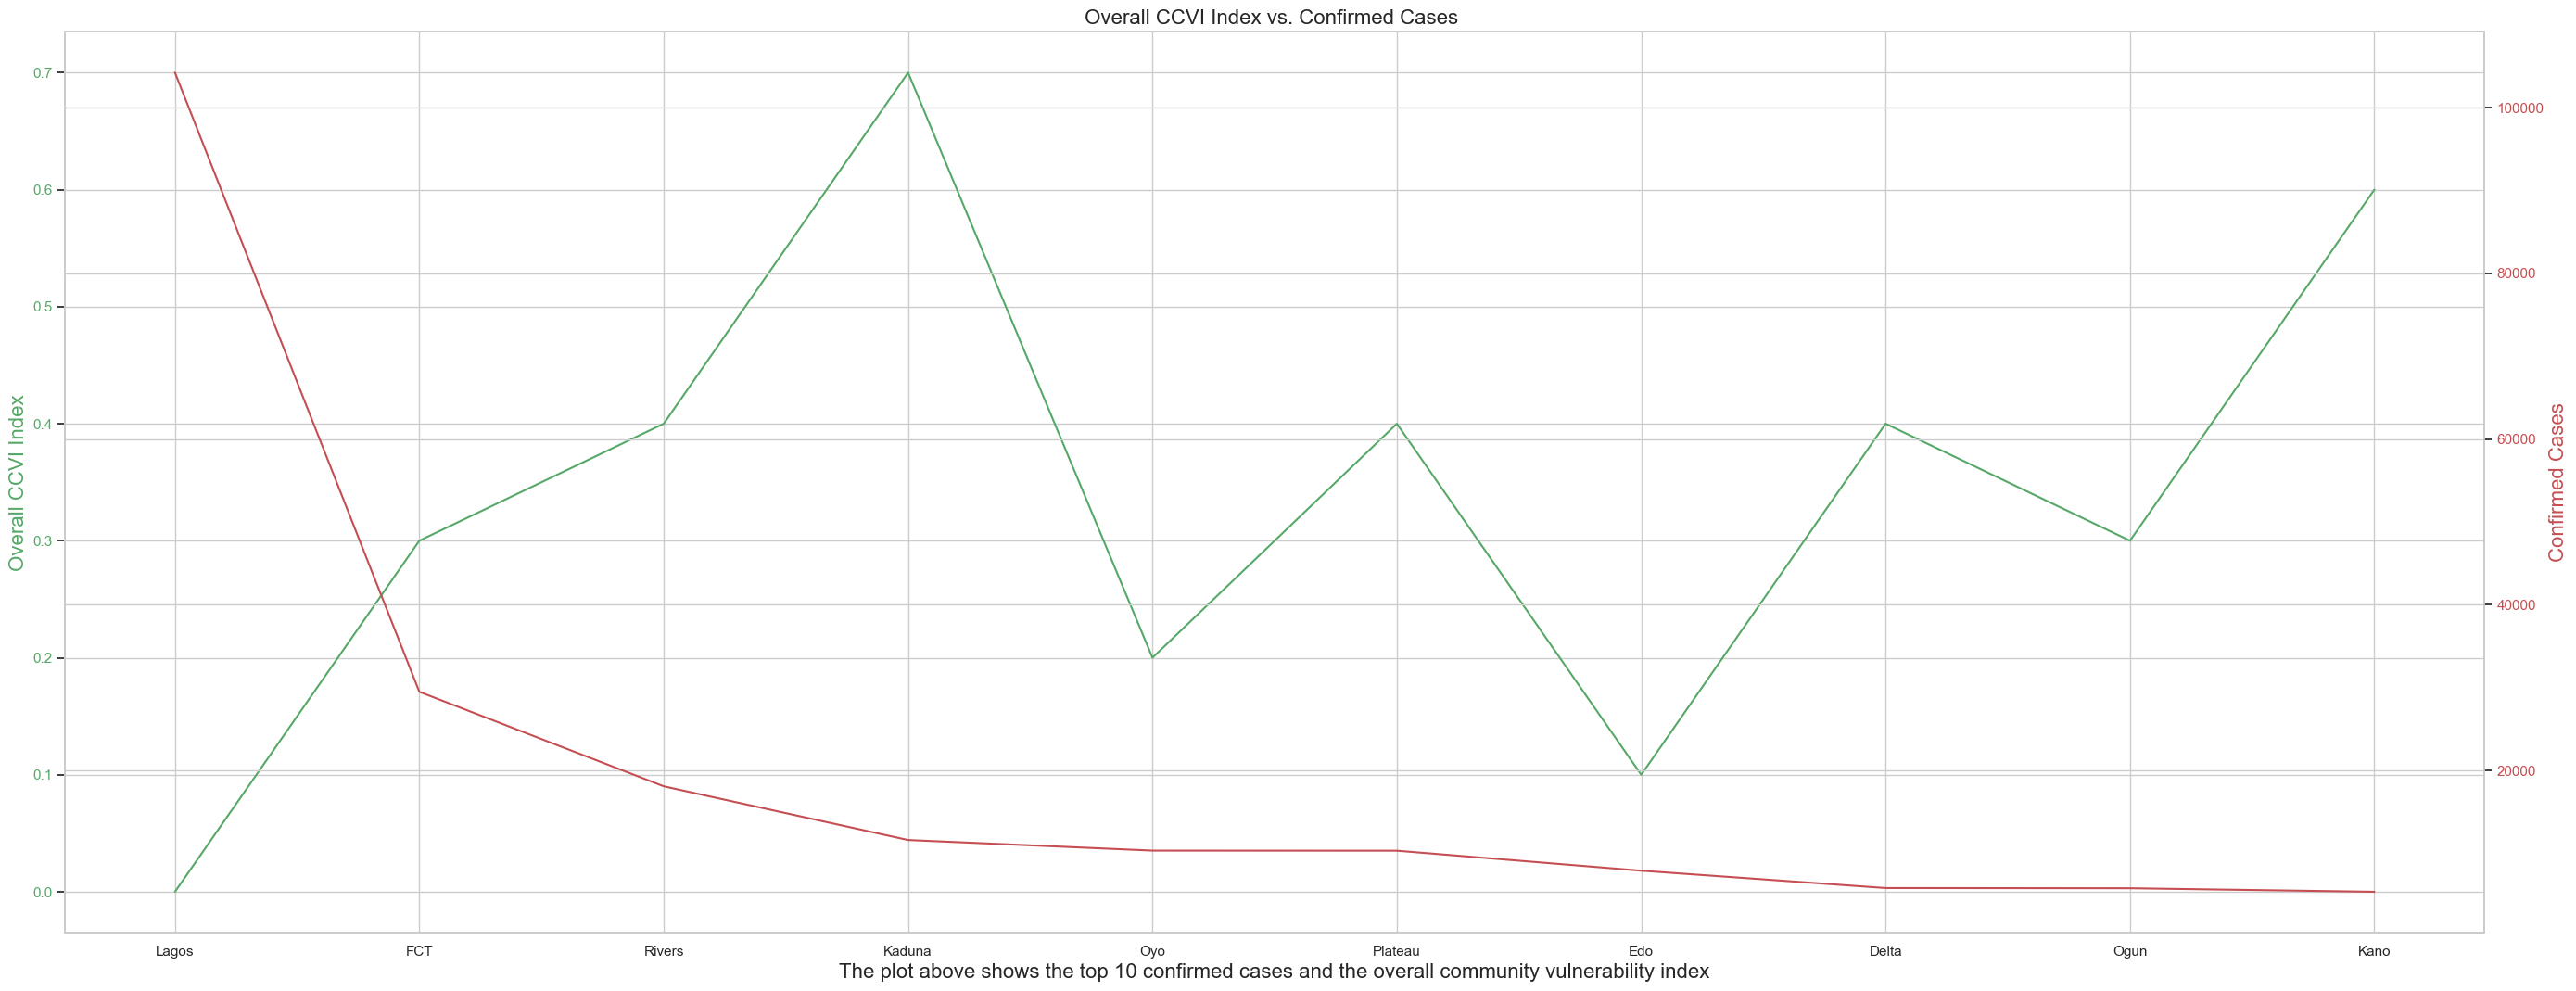

The plot above shows the top 10 confirmed cases and the overall community vulnerability index


In [58]:
fig = plt.figure(figsize=(30, 12))
ax1 = fig.add_subplot(111)
x = Top_10_NCDCextdata.states
y = Top_10_NCDCextdata['Overall CCVI Index']
y2 = Top_10_NCDCextdata.Confirmed
ax1.plot(x, y, 'g-')
ax1.set_ylabel('Overall CCVI Index', fontsize=16, color='g')
for tl in ax1.get_yticklabels():
    tl.set_color('g')
ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Confirmed Cases', color='r', fontsize=16)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.title('Overall CCVI Index vs. Confirmed Cases ', fontsize=16)
ax1.set_xlabel('Confirmed Cases', fontsize=16)
plt.show()
print('The plot above shows the top 10 confirmed cases and the overall community vulnerability index')

Investigate more into relationships between Overall CCVI Index and Confirmed cases

For this to be done, I will be using the corr() method to find if relationship exists between Overall CCVI Index and Confirmed cases

Hypothesis

In [62]:
H1 = 'Theres a relationship between  Overall CCVI Index and Confirmed cases'
H0 = 'Theres no relationship between Overall CCVI Index and Confirmed cases'

Forming new dataset 'data'

In [ ]:
data = Top_10_NCDCextdata[['states', 'Confirmed', 'Overall CCVI Index']]

In [64]:
corrmat = data.corr()
find_corrmat = corrmat.iloc[0,1]
find_corrmat
if find_corrmat > 0:
    print(f'{H1} as the value is {find_corrmat}')
else:
    print(f'{H0} as the value is {find_corrmat}')

Theres no relationship between Overall CCVI Index and Confirmed cases as the value is -0.5657535575134243


#### TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset

#####
Below, we will be investigating the relationship between Confirmed cases and Population Density.
Theory: There's more cases confirmed in higher population or places with higher population.
The regression line shows the best fit of all data points.
The regression will be modeled at 95% confidence intervals and at no confidence intervals
#####

#####
First we plot at first order

<Figure size 3000x1200 with 0 Axes>

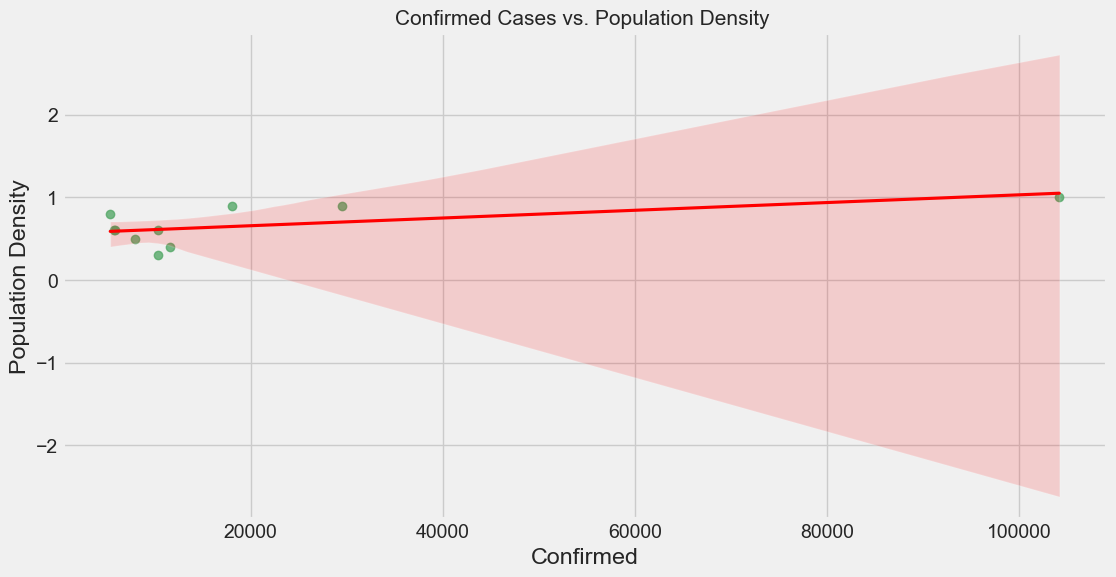

In [34]:
plt.figure(figsize=(30, 12))
ax = plt.subplots(figsize=(12, 6))
sns.set_theme(color_codes=True)
plt.rcParams['font.size'] = '30'
sns.set_style('whitegrid')
plt.title('Confirmed Cases vs. Population Density ', fontsize=15)
sns.regplot(x='Confirmed', y='Population Density', data=Top_10_NCDCextdata, scatter_kws={'color': 'g'},
            line_kws={'color': 'red'}, order=1)
plt.show()


From the above we see their are three data points that are best fits, however we have more points that are outside the best fit line.
Also it also points out that higher population density does equal higher confirmed cases.

To look further explore, we can see from the above, the straight line is not best fit, to make a more fit line, the order can be raised to 2 as illustrated below.

Text(0, 0.5, 'Population Density')

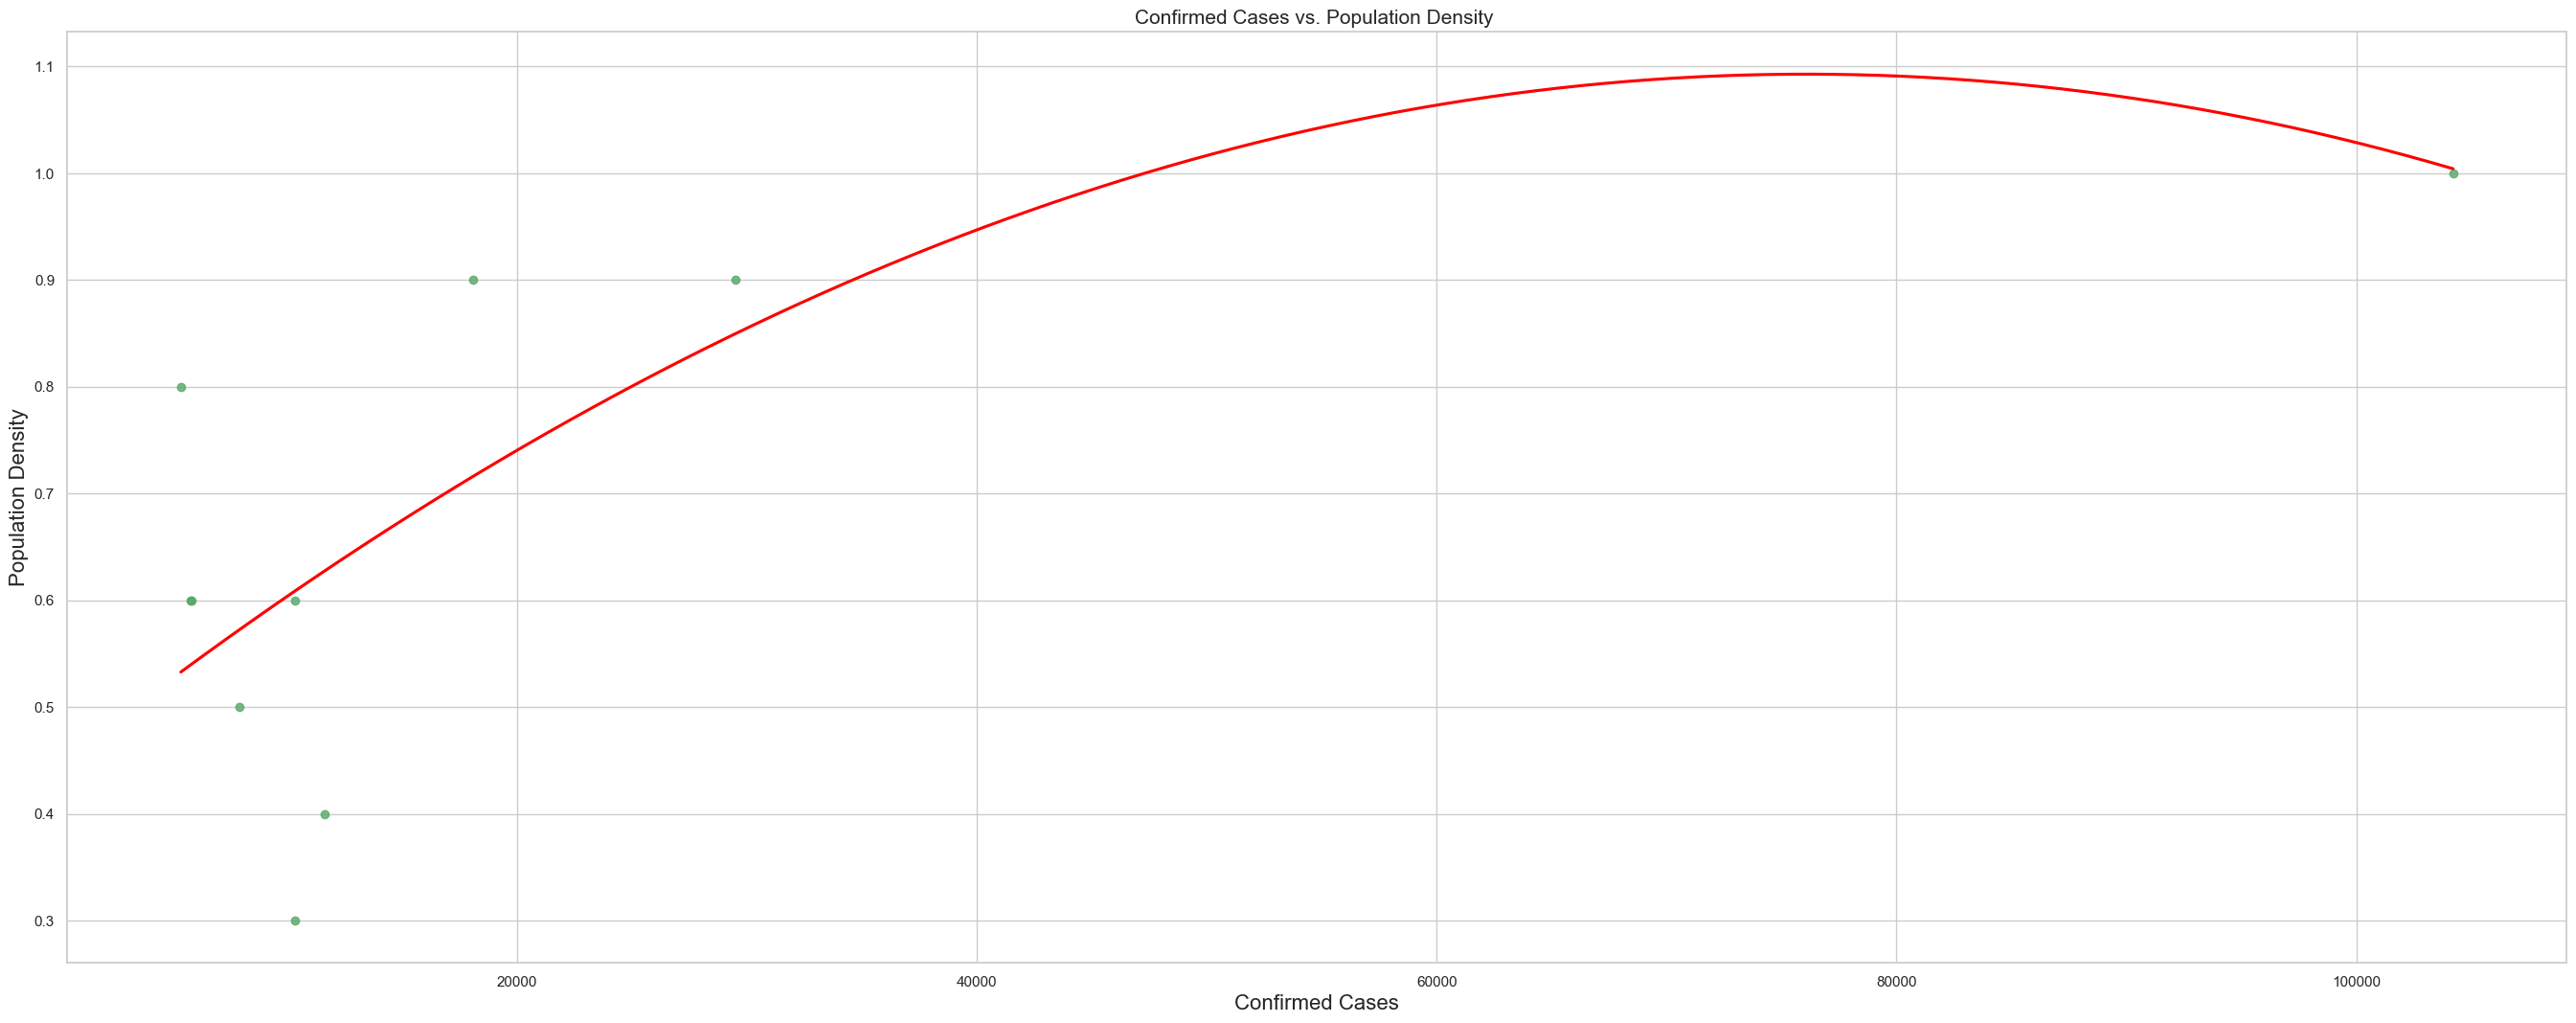

In [35]:
plt.figure(figsize=(30, 12))
fig.add_subplot(111)
sns.set_theme(color_codes=True)
plt.rcParams['font.size'] = '30'
sns.set_style('whitegrid')
plt.title('Confirmed Cases vs. Population Density ', fontsize=15)
sns.regplot(x='Confirmed', y='Population Density', data=Top_10_NCDCextdata, scatter_kws={'color': 'g'},
            line_kws={'color': 'red'}, order=2, ci=None)
plt.xlabel('Confirmed Cases', fontsize=16)
plt.ylabel('Population Density', fontsize=16)


Summary
At 95% confidence interval, it stands that there is significant relationship between population density and confirmed cases. That's to say, higher population does mean there will be higher confirmed cases of COVID-19.

### TODO J -

Below, we will be investigating the relationship between Deaths and Age.

Theory: There’s more Deaths in with aging population. The regression line shows the best fit of all data points. The regression will be modeled at 95% confidence intervals and at no confidence intervals

In [70]:
H1 = 'Theres a relationship between  Age  and Deaths'
H0 = 'Theres no relationship between Age  and Deaths'

Selecting the Top 10 deaths

In [69]:
Top_10_NCDCDeath = NCDCextdata.nlargest(10, columns=['Deaths'])
Top_10_NCDCDeath

,states,Confirmed,Admissions,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104204,1061,102372,771,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
6,Edo,7927,4,7601,322,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
1,FCT,29508,19,29240,249,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
4,Oyo,10352,0,10150,202,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
2,Rivers,18108,-1,17954,155,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
9,Kano,5384,38,5219,127,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
7,Delta,5834,552,5170,112,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
10,Ondo,5173,315,4749,109,South West,5185000.0,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
14,Osun,3311,29,3190,92,South West,5252000.0,0.0,0.7,0.4,0.4,0.0,0.8,0.1,0.2,1.06
3,Kaduna,11628,3,11536,89,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86


In [71]:
data2 = Top_10_NCDCDeath[['states', 'Deaths', 'Age']]
corrmat2 = data2.corr()
print(corrmat2)

find_corrmat2 = corrmat2.iloc[0,1]

if find_corrmat > 0:
    print(f'{H1} as the value is {find_corrmat2}')
else:
    print(f'{H0} as the value is {find_corrmat2}')

          Deaths       Age
Deaths  1.000000 -0.301967
Age    -0.301967  1.000000
Theres no relationship between Age  and Deaths as the value is -0.30196665033147674


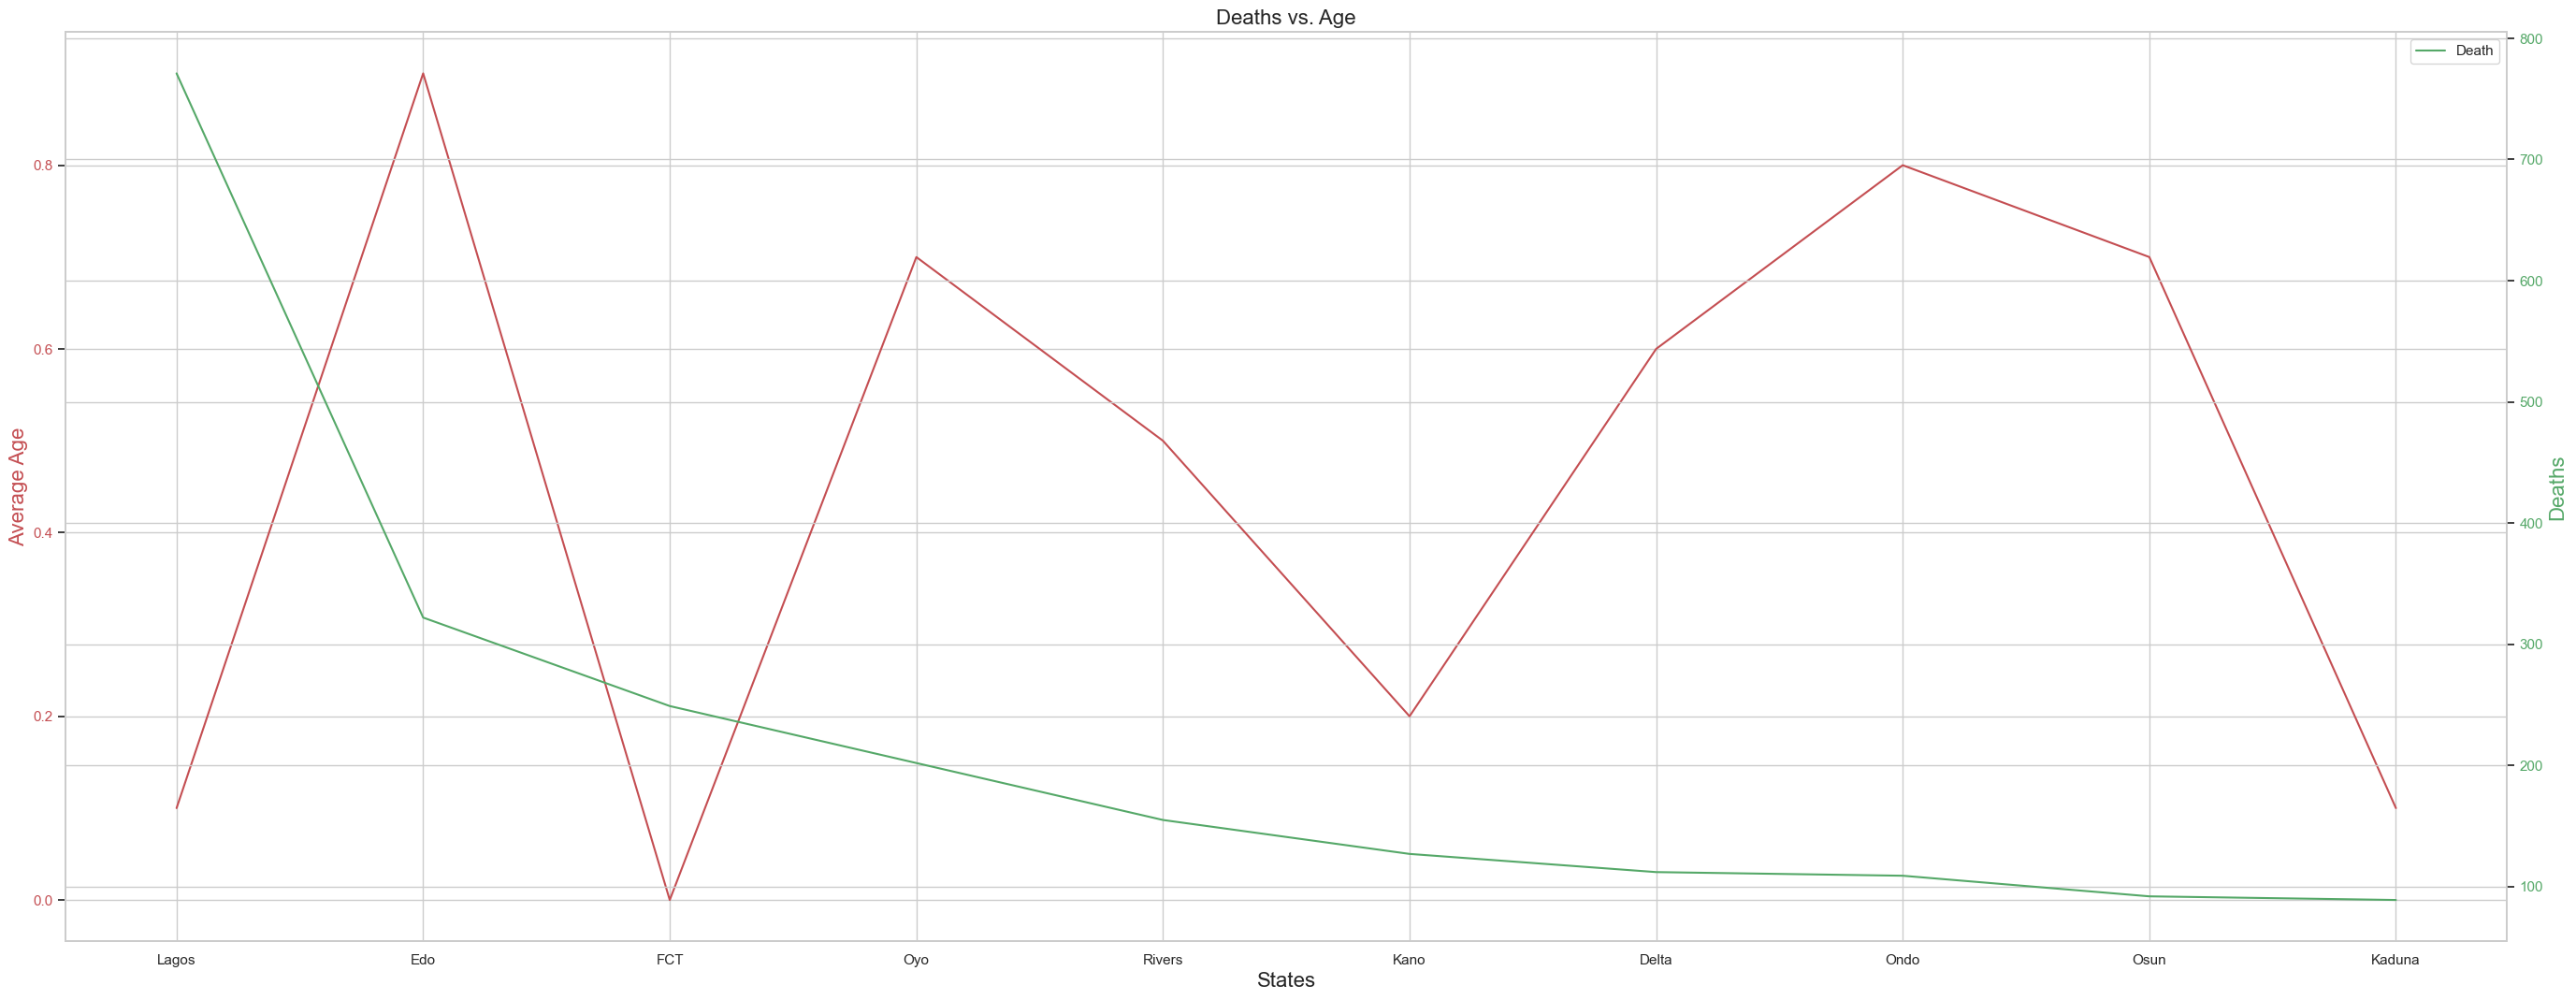

In [38]:
fig = plt.figure(figsize=(30, 12))
ax1 = fig.add_subplot(111)
x = Top_10_NCDCDeath.states
y = Top_10_NCDCDeath.Age
y2 = Top_10_NCDCDeath.Deaths
ax1.plot(x, y, 'r-')
ax1.set_ylabel('Average Age', fontsize=16, color='r')

for tl in ax1.get_yticklabels():
    tl.set_color('r')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'g-')
ax2.set_ylabel('Deaths', color='g', fontsize=16)
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Deaths vs. Age', fontsize=16)
ax1.set_xlabel('States', fontsize=16)

plt.legend(['Age'])
plt.legend(['Death'])

plt.show()

Summary

In [39]:
MaxDeath = max(Top_10_NCDCDeath['Deaths'])
state = Top_10_NCDCDeath['Deaths'] == MaxDeath
state = Top_10_NCDCDeath[state]['states'].item()
print(f'Maximum death record is: {MaxDeath}')
print(f'State with the Maximum recorded death is: {state}')

Maximum death record is: 771
State with the Maximum recorded death is: Lagos


In [40]:
MinDeath = min(Top_10_NCDCDeath['Deaths'])
state = Top_10_NCDCDeath['Deaths'] == MinDeath
state = Top_10_NCDCDeath[state]['states'].item()
print(f'Minimum death record is: {MinDeath}')
print(f'State with the Minimum recorded death is: {state}')

Minimum death record is: 89
State with the Minimum recorded death is: Kaduna


### TODO L -Determine the effect of the Pandemic on the economy

Create new dataframe for RealGDP for year 2020

In [41]:
new_RealGDP = pd.melt(RealGDP, id_vars='Year', value_vars=['Q1', 'Q2', 'Q3', 'Q4'], var_name='Quarter',
                      value_name='GDP')
new_RealGDP2020 = new_RealGDP['Year'] == 2020
new_RealGDP = new_RealGDP[new_RealGDP2020]
new_RealGDP

,Year,Quarter,GDP
6,2020,Q1,16740000.0
13,2020,Q2,15890000.0
20,2020,Q3,17820000.0
27,2020,Q4,0.0


Adding growth rate of the GDP

In [42]:
new_RealGDP['Percentage'] = ((new_RealGDP.GDP.diff() / new_RealGDP.GDP) * 100).fillna(0).replace(
    [-np.inf], 0)
new_RealGDP

,Year,Quarter,GDP,Percentage
6,2020,Q1,16740000.0,0.000000
13,2020,Q2,15890000.0,-5.349276
20,2020,Q3,17820000.0,10.830527
27,2020,Q4,0.0,0.000000


Getting GDP value for 2020 Second Quarter

In [43]:
Q2 = list(new_RealGDP[new_RealGDP.Quarter == 'Q2'].GDP)
Q2

[15890000.0]

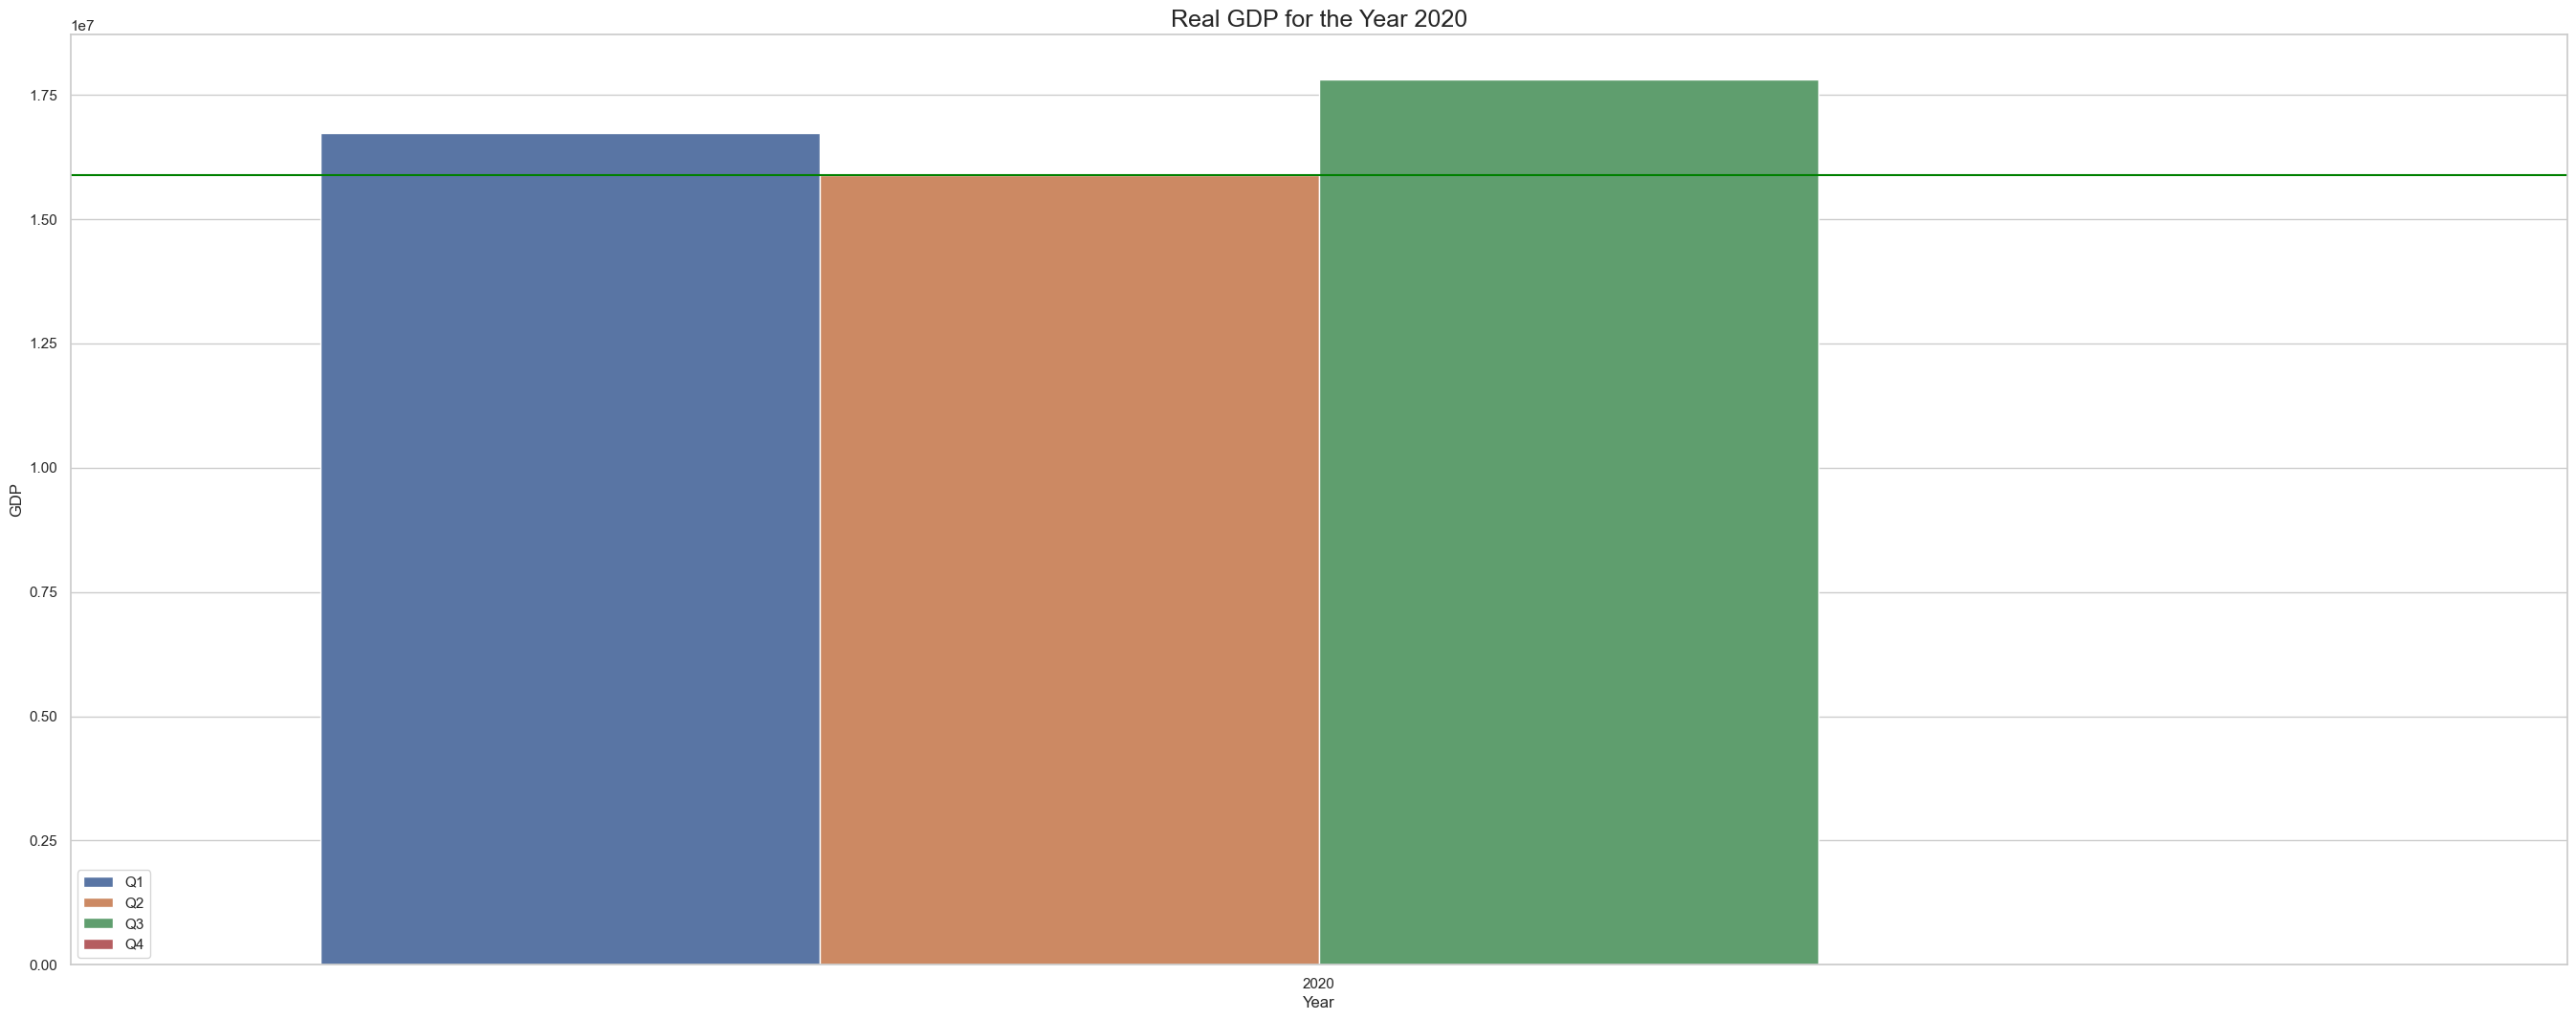

In [44]:
plt.figure(figsize=(30, 12))
sns.set_theme(style="whitegrid")
sns.barplot(x='Year', y='GDP', data=new_RealGDP, hue='Quarter')
plt.legend(loc=3)
plt.axhline(y=Q2, color="green", linestyle="-", label='Second Quarter')
plt.title('Real GDP for the Year 2020', fontsize=18)
plt.show()

With Data labels

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


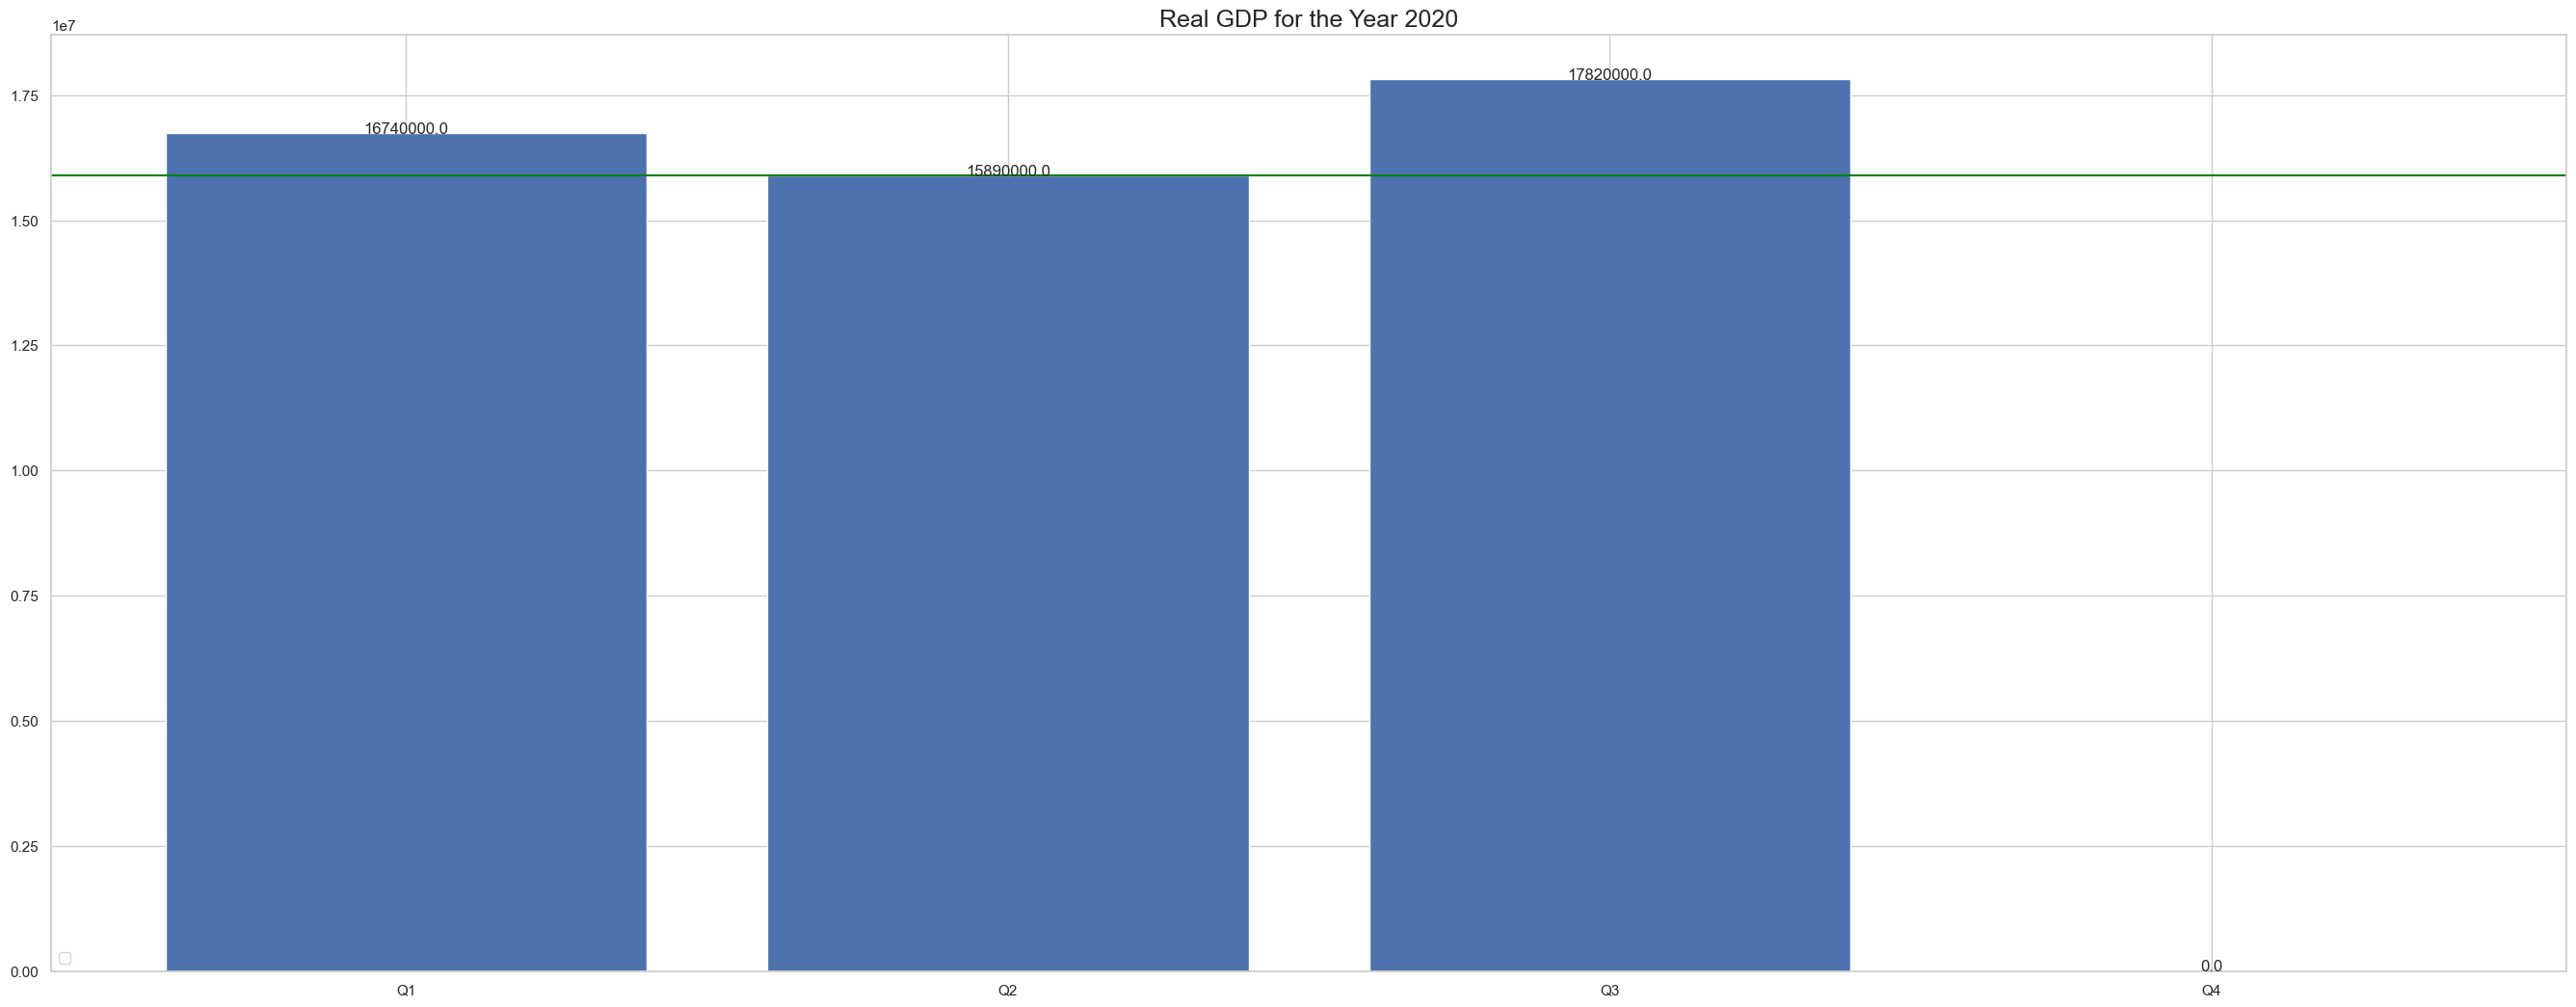

In [45]:
plt.figure(figsize=(30, 12))
sns.set_theme(style="whitegrid")

plt.axhline(y=Q2, color="green", linestyle="-")
plt.title('Real GDP for the Year 2020', fontsize=18)


def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')


x = np.array(new_RealGDP['Quarter'])
y = np.array(new_RealGDP['GDP'])
addlabels(x, y)
plt.legend(loc=3)
plt.bar(x, y)
plt.show()

### Observation

From the above charts, using the second quarter of GDP as a benchmark, it can be seen overall GDP drop from the first quarter is not much as the increase in the third quarter actually shows that the pandemic didn't show significant impact. To further view by how much percentage drop from the second quarter, the chart below shows the percentage difference.

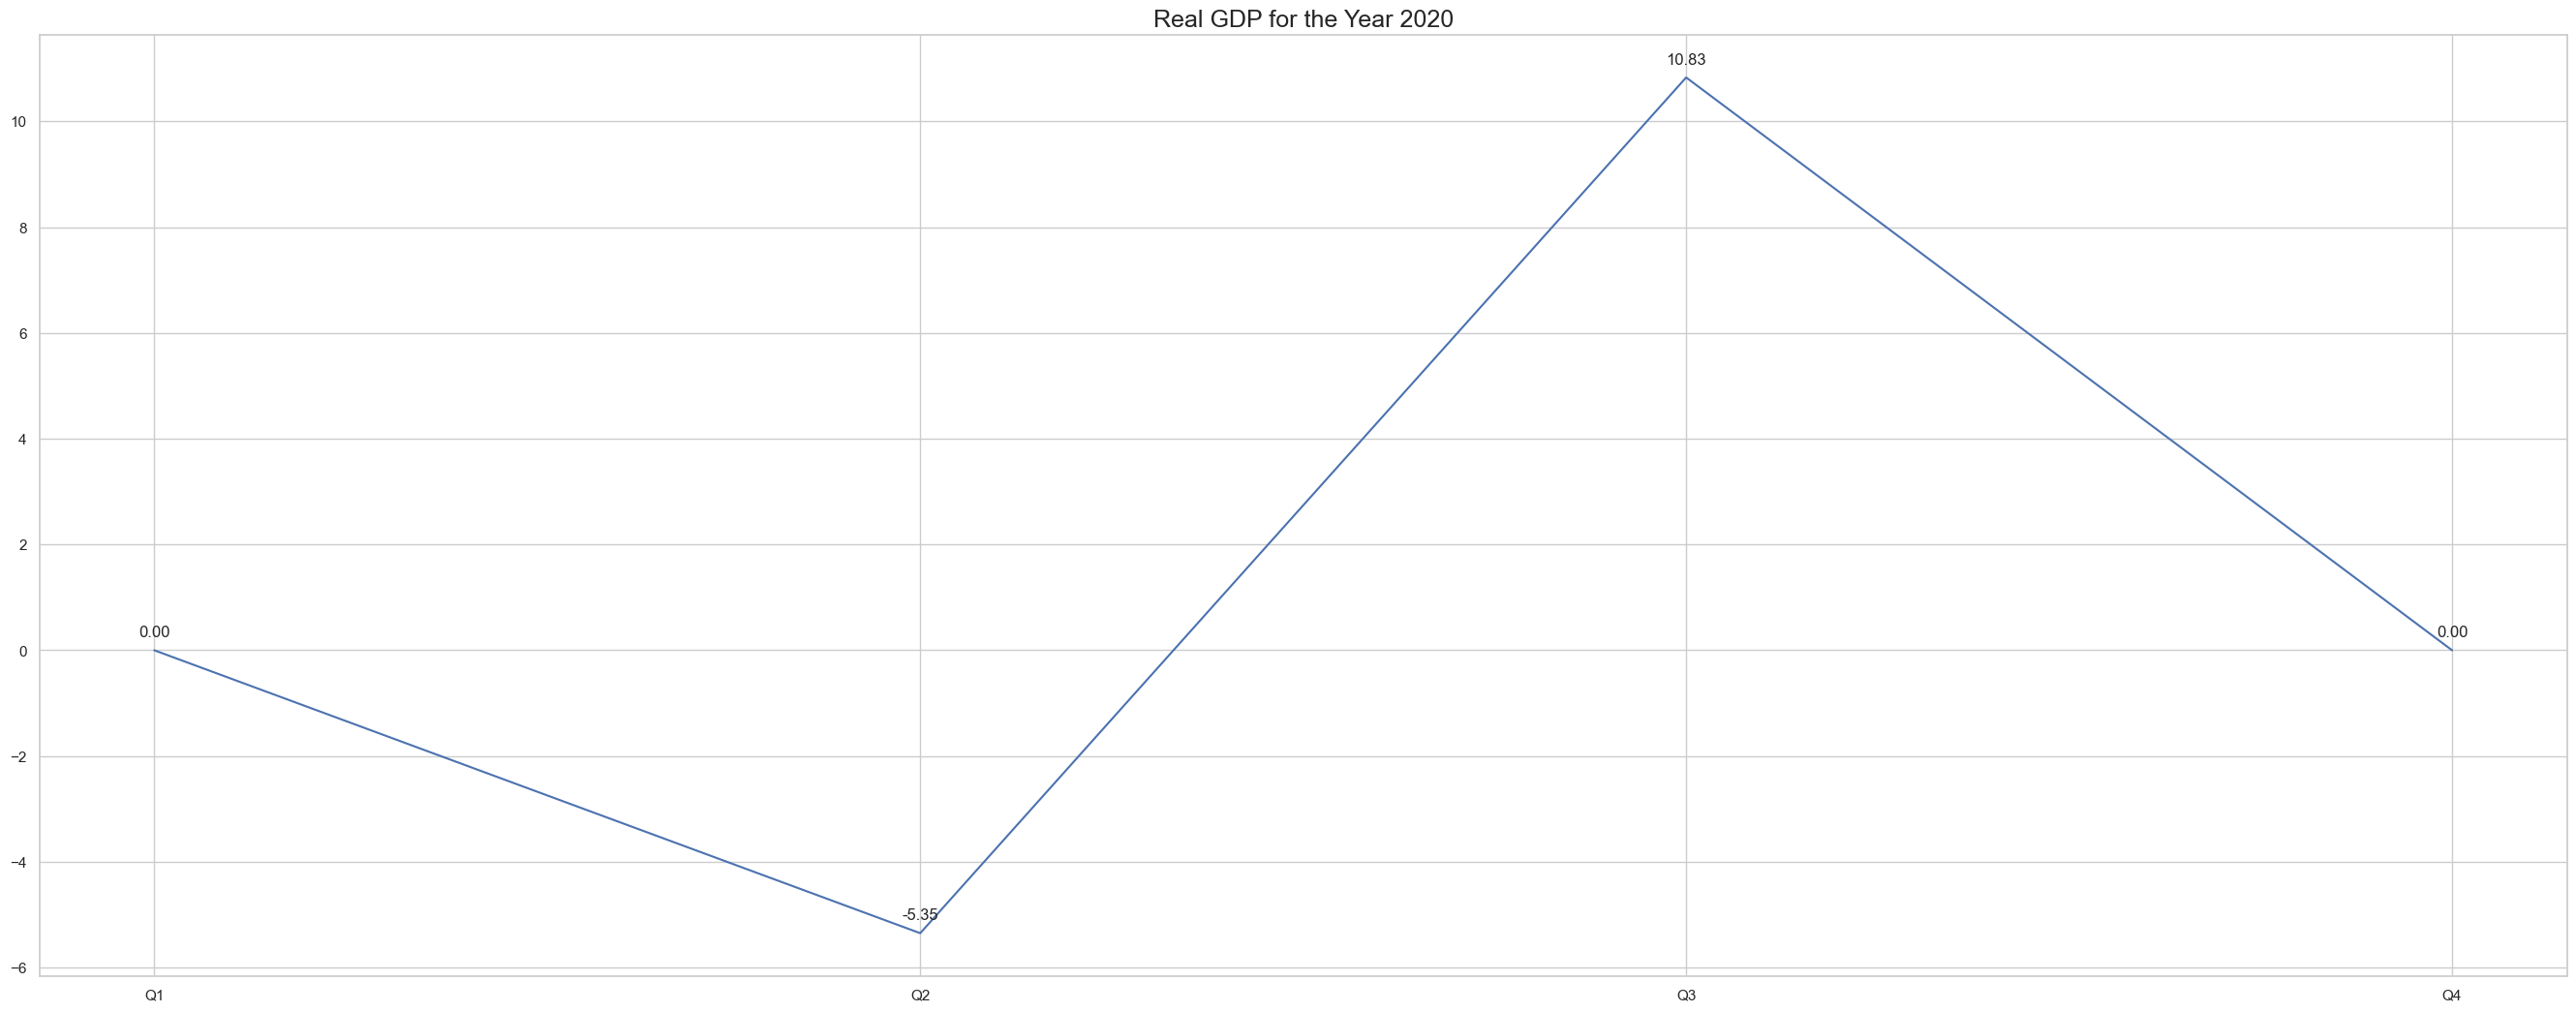

In [46]:
plt.figure(figsize=(30, 12))
plt.plot('Quarter', 'Percentage', data=new_RealGDP)
#sns.barplot(x='Quarter', y='Percentage', data=new_RealGDP, hue='Quarter')
#plt.legend(loc=3)
plt.title('Real GDP for the Year 2020', fontsize=18)
for x, y in zip(new_RealGDP['Quarter'], new_RealGDP['Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,  # this is the text
                 (x, y),  # these are the coordinates to position the label
                 textcoords="offset points",  # how to position the text
                 xytext=(0, 10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center
plt.show()

### Observation

#### Furthering the analysis, from the above chart, it can seen that the GDP dropped from the first quarter by 5.35% and increase in the third quarter by 10.83%. This further shows that the pandemic don't have a significant impact on the GDP.

### To further analyse the impact of the pandemic, the chart below shows the overall GDP year on year

In [47]:
new_RealGDP2 = RealGDP

new_RealGDP2['GDP'] = new_RealGDP2[['Q1','Q2','Q3']].sum(axis =1)

new_RealGDP2  =new_RealGDP2[['Year','GDP']]

print(new_RealGDP2)

   Year          GDP
0  2014  49002429.39
1  2015  50490177.88
2  2016  49717698.64
3  2017  49892913.27
4  2018  50758504.36
5  2019  51860101.71
6  2020  50450000.00


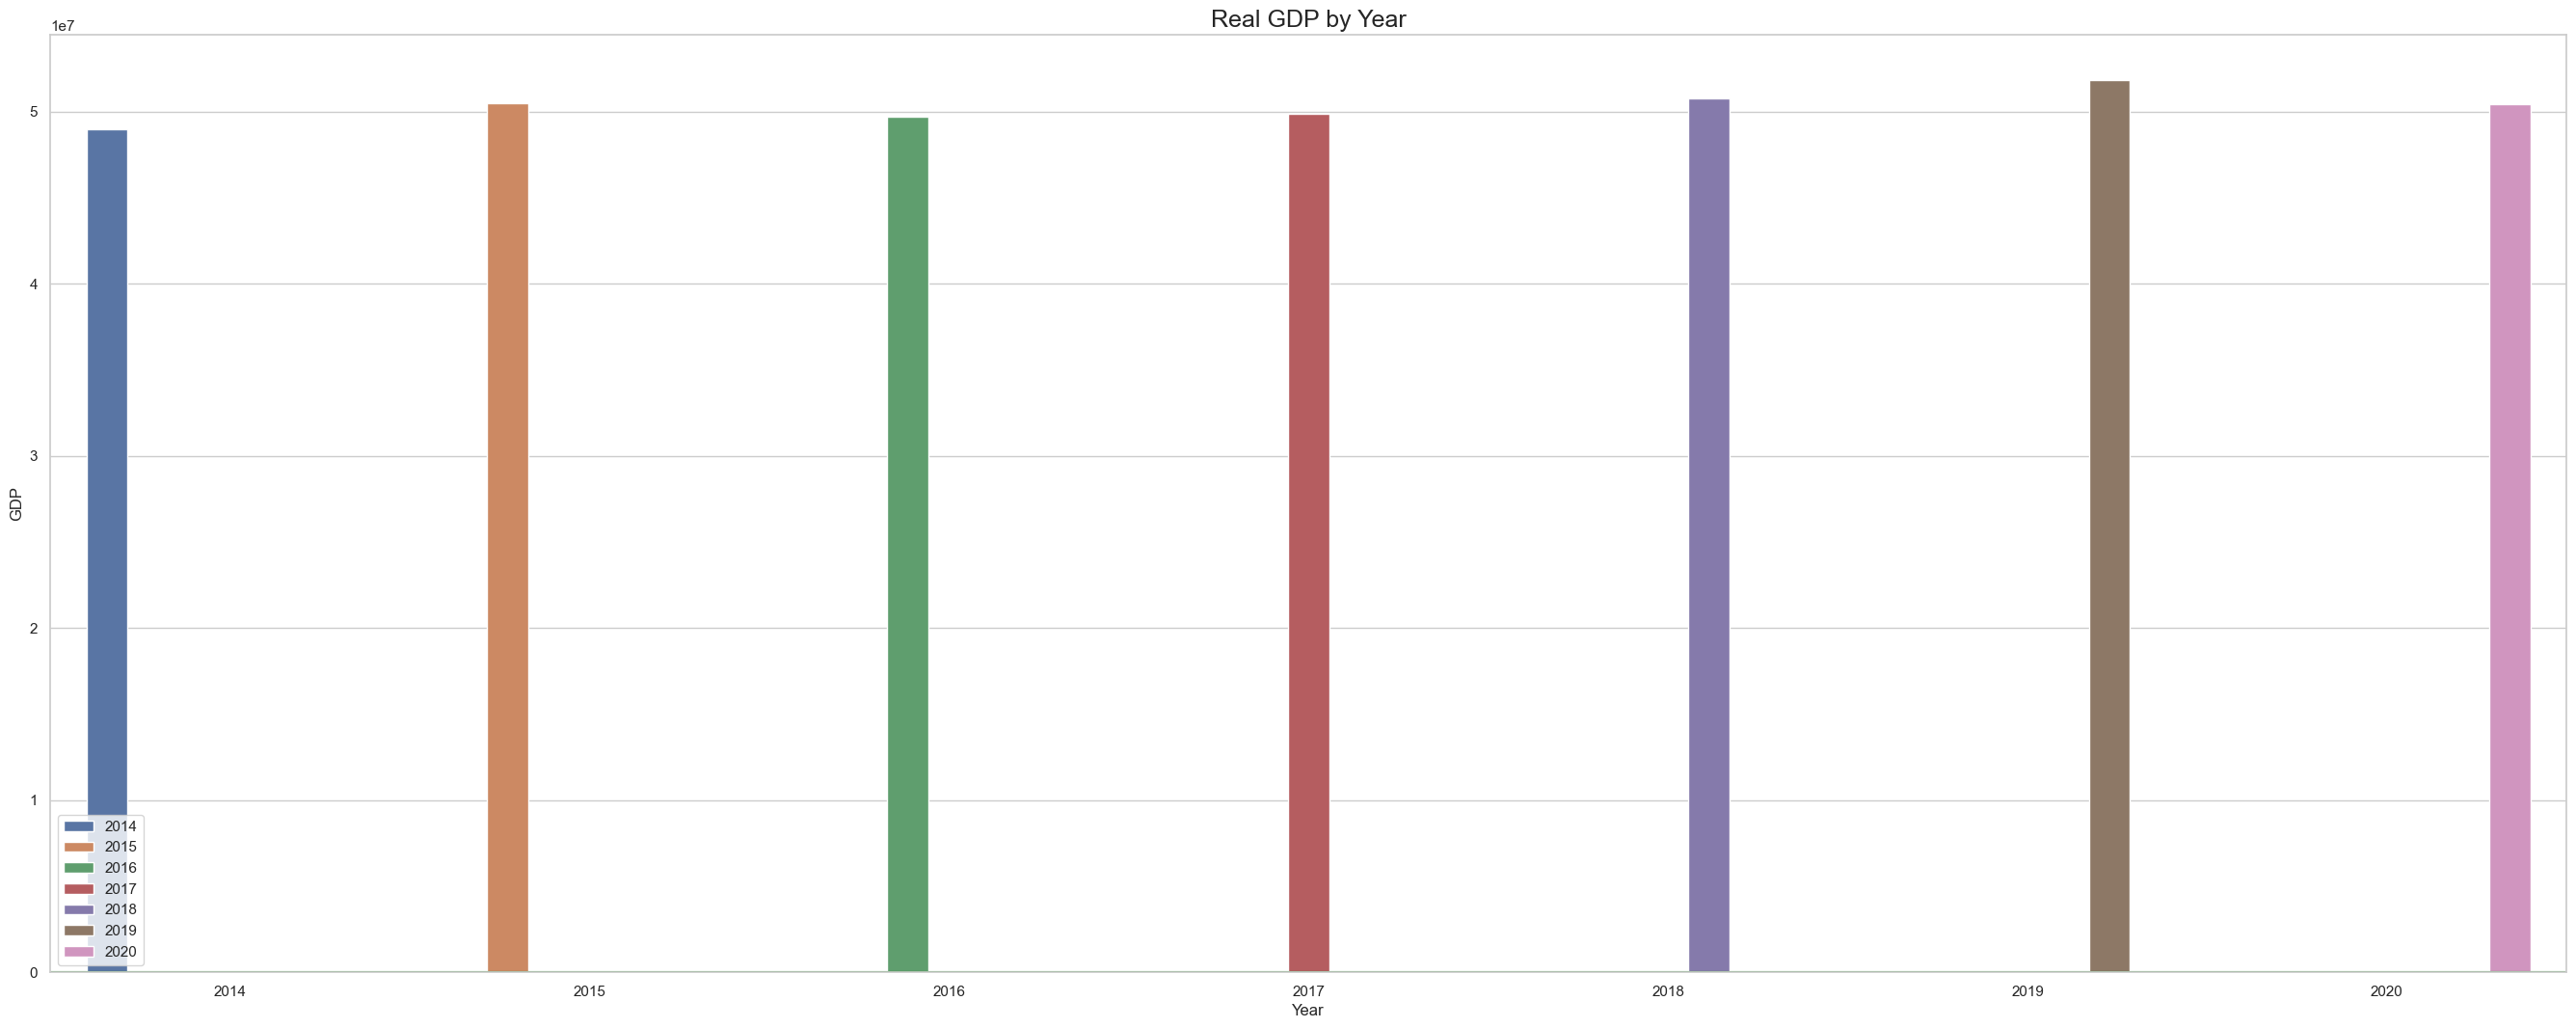

In [48]:
plt.figure(figsize=(30, 12))
sns.set_theme(style="whitegrid")
sns.barplot(x='Year', y='GDP', data=new_RealGDP2, hue='Year')
plt.legend(loc=3)
plt.axhline(y=2022, color="green", linestyle="-", label='Second Quarter')
plt.title('Real GDP by Year', fontsize=18)
plt.show()

[49002429.39 50490177.88 49717698.64 49892913.27 50758504.36 51860101.71
 50450000.  ] [2014 2015 2016 2017 2018 2019 2020]


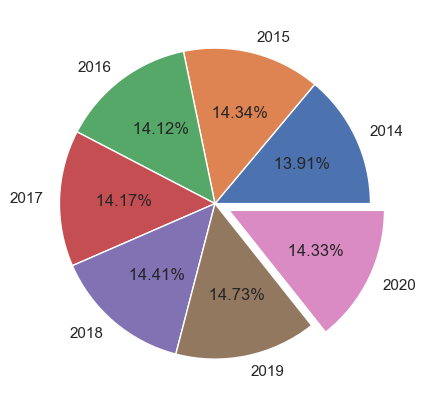

In [49]:
x=np.array(new_RealGDP2['GDP'])
y=np.array(new_RealGDP2['Year'])
# declaring exploding pie
explode = [0, 0, 0, 0, 0,0,0.1]
print(x,y)
plt.pie(x,labels = y, explode=explode, autopct='% .2f%%')
plt.show()

From the above pie chart, it can be seen that the pandemic did not have much effect on the GDP.